In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
train = pd.read_csv("train.csv")
test= pd.read_csv('test.csv')
submission= pd.read_csv('gender_submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Titanic

## 전처리

In [5]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
train = train.drop('Cabin',axis=1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [9]:
train.Age.mean()

29.69911764705882

In [10]:
train.Age = train.Age.fillna(int(train.Age.mean()))

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
train.Age.sum()

26338.17

In [13]:
temp = []
for i in range(len(train)):
    x= train.Age[i]-int(train.Age[i])
    if x != 0:
        temp.append(i)

print(temp)

[57, 78, 111, 116, 122, 123, 148, 152, 153, 203, 227, 296, 305, 331, 469, 525, 644, 676, 735, 755, 767, 803, 814, 831, 843]


In [14]:
train.Age[111]

14.5

나이가 .x 로 끝나는게 이상하다고 생각함 -> int형으로 바꿈

In [15]:
train.Age = train.Age.astype(int)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


In [17]:
train.Age.sum()

26324

In [18]:
train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
train.Embarked.fillna('S', inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


## EDA

In [21]:
train[(train.Survived==1)&(train['SibSp']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38,1,5,347077,31.3875,S
...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45,1,1,36928,164.8667,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27,1,0,SC/PARIS 2149,13.8583,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4,1,1,347742,11.1333,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,S


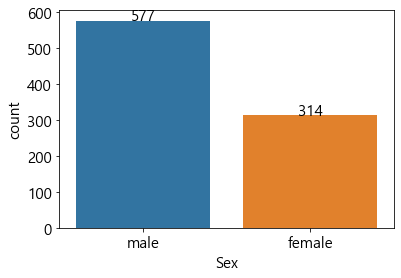

In [22]:
bar = sns.countplot(x=train['Sex'],data=train)

for i in range(train.Sex.value_counts().shape[0]):
    bar.text(x=i, y=train.Sex.value_counts()[i], s=train.Sex.value_counts()[i],
            horizontalalignment='center')


In [23]:
w =train[train['Survived']==1]['Sex'].value_counts()[::-1]
ww = train[train['Survived']==0]['Sex'].value_counts()

sur = []
for i in range(2):
    sur.append(ww[i])
    sur.append(w[i])

sx = ['male','male','female','female']

sex_sur = pd.Series(sur,index=sx)
sex_sur

male      468
male      109
female     81
female    233
dtype: int64

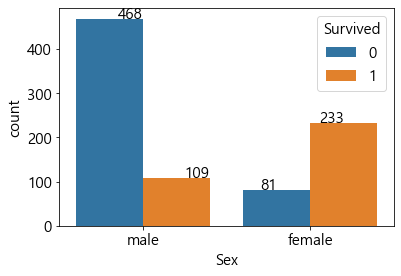

<Figure size 720x576 with 0 Axes>

In [24]:
bar = sns.countplot(data=train, x='Sex', hue='Survived')
plt.figure(figsize=(10,8))
for i in range(sex_sur.shape[0]):
    bar.text(x=i/2.5 ,y=sex_sur[i], s=sex_sur[i], horizontalalignment='right')

여성이 더 많이 생존했다.

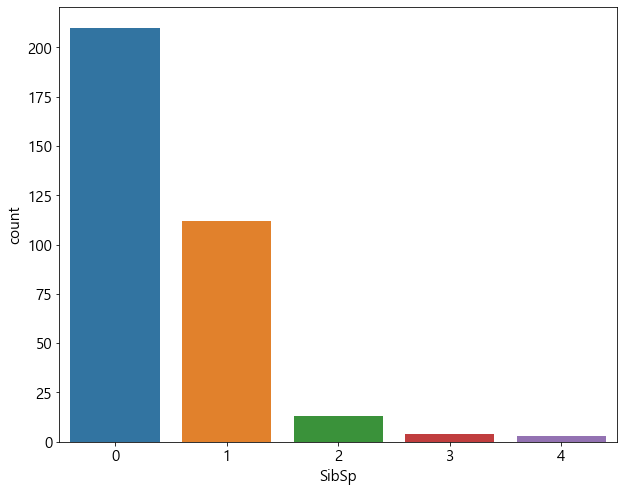

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x=train[train.Survived==1]['SibSp'],data=train)
plt.show()

부양가족이 많으면 생존확률이 떨어진다.

In [26]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

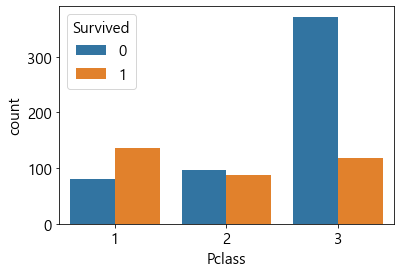

In [27]:
sns.countplot(data=train, x='Pclass',hue='Survived')

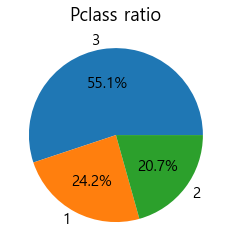

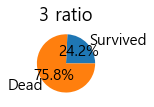

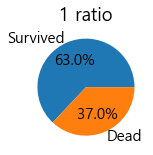

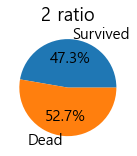

<Figure size 720x504 with 0 Axes>

In [28]:
ratio = train['Pclass'].value_counts(sort=False)
size = ratio.size
index = ratio.index
surv = train[train['Survived']==1]['Pclass'].value_counts(sort=False)
dead = train[train['Survived']==0]['Pclass'].value_counts(sort=False)

plt.plot(aspect='auto')
plt.pie(ratio,labels=index, autopct='%1.1f%%')
plt.title("Pclass ratio")
plt.show()

for x,y in enumerate(index):
    plt.subplot(1,size+1, x+1,aspect='equal')
    plt.pie([surv[y], dead[y]], labels=['Survived','Dead'], autopct='%1.1f%%')
    plt.title(str(y)+' ratio')
    plt.figure(figsize=(10,7))

plt.show()

3번째 클래스 사람이 많았고 많이 죽었다.

In [29]:
print(train[train['Pclass']==1]['Fare'].max())
print(train[train['Pclass']==2]['Fare'].max())
print(train[train['Pclass']==3]['Fare'].max())

512.3292
73.5
69.55


## M/L

In [30]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [31]:
train = train.drop(columns=['PassengerId','Name','Parch','Ticket'])

### Feature Engineering

In [32]:
train_oneh = pd.get_dummies(train, columns=["Sex","Embarked"])
train_oneh

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,7.2500,0,1,0,0,1
1,1,1,38,1,71.2833,1,0,1,0,0
2,1,3,26,0,7.9250,1,0,0,0,1
3,1,1,35,1,53.1000,1,0,0,0,1
4,0,3,35,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,13.0000,0,1,0,0,1
887,1,1,19,0,30.0000,1,0,0,0,1
888,0,3,29,1,23.4500,1,0,0,0,1
889,1,1,26,0,30.0000,0,1,1,0,0


In [33]:
x,y = train_oneh.drop(columns='Survived'), train_oneh.Survived

scaler = MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[1.    , 0.275 , 0.125 , ..., 0.    , 0.    , 1.    ],
       [0.    , 0.475 , 0.125 , ..., 1.    , 0.    , 0.    ],
       [1.    , 0.325 , 0.    , ..., 0.    , 0.    , 1.    ],
       ...,
       [1.    , 0.3625, 0.125 , ..., 0.    , 0.    , 1.    ],
       [0.    , 0.325 , 0.    , ..., 1.    , 0.    , 0.    ],
       [1.    , 0.4   , 0.    , ..., 0.    , 1.    , 0.    ]])

In [34]:
data = pd.DataFrame(x_scaled)
data.columns = x.columns
data

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.2750,0.125,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.0,0.4750,0.125,0.139136,1.0,0.0,1.0,0.0,0.0
2,1.0,0.3250,0.000,0.015469,1.0,0.0,0.0,0.0,1.0
3,0.0,0.4375,0.125,0.103644,1.0,0.0,0.0,0.0,1.0
4,1.0,0.4375,0.000,0.015713,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.5,0.3375,0.000,0.025374,0.0,1.0,0.0,0.0,1.0
887,0.0,0.2375,0.000,0.058556,1.0,0.0,0.0,0.0,1.0
888,1.0,0.3625,0.125,0.045771,1.0,0.0,0.0,0.0,1.0
889,0.0,0.3250,0.000,0.058556,0.0,1.0,1.0,0.0,0.0


In [35]:
reg = LogisticRegression()
reg.fit(data,y)
pred = reg.predict(data)
print(accuracy_score(y,pred))

0.7946127946127947


In [36]:
test.drop(columns=['PassengerId','Name','Parch','Ticket','Cabin'],inplace=True)


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [39]:
test = test.fillna(int(train.Age.mean()))
test = test.fillna(train.Fare.mean())

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Fare      418 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [41]:
test_oneh = pd.get_dummies(data=test, columns=['Sex','Embarked'])

t_scaled = scaler.transform(test_oneh)

t_data = pd.DataFrame(t_scaled)
t_data.columns = test_oneh.columns

t_data

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.43125,0.000,0.015282,0.0,1.0,0.0,1.0,0.0
1,1.0,0.58750,0.125,0.013663,1.0,0.0,0.0,0.0,1.0
2,0.5,0.77500,0.000,0.018909,0.0,1.0,0.0,1.0,0.0
3,1.0,0.33750,0.000,0.016908,0.0,1.0,0.0,0.0,1.0
4,1.0,0.27500,0.125,0.023984,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,1.0,0.36250,0.000,0.015713,0.0,1.0,0.0,0.0,1.0
414,0.0,0.48750,0.000,0.212559,1.0,0.0,1.0,0.0,0.0
415,1.0,0.48125,0.000,0.014151,0.0,1.0,0.0,0.0,1.0
416,1.0,0.36250,0.000,0.015713,0.0,1.0,0.0,0.0,1.0


In [42]:
res = reg.predict(t_data)

In [43]:
submission['Survived'] = res

In [44]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [45]:
submission.to_csv('submission.csv', index=False)